## <p style="background-color:#757D70;color:#D5CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Partie** :K-Means   </p>

---
- Groupe 2
- Professeur : [**Sayoba GANSANE**]()
- Ecole : [**Université Alioune Diop de Bambey (UADB)**]()
- Projet: [**Data Mining Approche Informatique**]()
- Niveau :  [**Master 2 : Statistique et Informatique Decisionnel (SID)**]()



---

### Segmentation des clients avec K-means

**Objectif :**  
Identifier des groupes de clients similaires afin de personnaliser la stratégie marketing.
La segmentation K-means permet de regrouper les clients selon leurs comportements d’achat
en utilisant des variables quantitatives telles que :
- fréquence d’achat,
- montant total dépensé,
- ancienneté du client.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Chargement des données nettoyées

Les données utilisées contiennent :
- l'identifiant client (CustomerID),
- la date de la transaction (InvoiceDate),
- le montant total par transaction (TotalPrice).


In [17]:
data = pd.read_csv("donnees_ecommerce_netoyer.csv", encoding="latin-1")

In [18]:
df = data.copy()

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Prix,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [43]:
#Nombre de variables
def nb_col(base):
    return len(base.columns)

#Nombre d'observation
def nb_lignes(base):     
    return len(base)

#Nombre de valeurs manquantes
def nb_val_manquante(base):
    return base.isna().sum().sum()

#Pourcentage de valeurs manquantes
def freq_val_manquante(base):
    return base.isna().sum().sum()/(base.size)

#Nombre de lignes dupliqués
def nb_lignes_dupliq(base):
    return len(base)-len(base.drop_duplicates())

#Pourcentage de ligne dupliqués
def freq_lignes_dupliq(base):
    return nb_lignes_dupliq(base)/nb_lignes(base)

#Nombre de lignes entierement vide
def nb_lignes_vide(base):
    return base.isna().all(axis=1).sum()

#Pourcentage de ligne entierement vides
def freq_lignes_vide(base):
    return base.isna().all(axis=1).sum()/nb_lignes(base)

##Nombre de colonnes vides
def col_vide(base):
    return base.isnull().all().sum().sum()

##Pourcentage de colonnes vides
def freq_col_vide(base):
    return base.isnull().all().sum().sum()/nb_col(base)

##Nombre de colonnes ayant le même nom
def nom_col_dupliq(base):
    return base.columns.duplicated().sum()

## colonnes dupliquées en fonction des observation même si les noms sont identiques
def getDuplicateColumns(base):
    duplicateColumnNames = set()

    for x in range(base.shape[1]):
        col = base.iloc[:, x]

        for y in range(x + 1, base.shape[1]):
            otherCol = base.iloc[:, y]

            if col.equals(otherCol):
                duplicateColumnNames.add(base.columns.values[y])

    return list(duplicateColumnNames)

## Compter le nombre de colonnes dupliquées
def nb_col_dupliq(base):
    return len(getDuplicateColumns(base))

#### Recupérations des noms des colonnes et Dataframe
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


#Affichage des statistiques globales sur le dataframe
def stat_globale(base):    
    print('Données : {}'.format(namestr(base, globals())))
    print('Nombre de variables : {}'.format(nb_col(base)))
    print('Nombre des observations : {}'.format(nb_lignes(base)))
    print('Nombre de valeurs manquantes : {}'.format(nb_val_manquante(base)))
    print('% valeurs manquantes : {:.2%}'.format(freq_val_manquante(base)))
    print('Nombre de lignes dupliquées : {}'.format(nb_lignes_dupliq(base)))
    print('% de lignes dupliquées : {:.2%}'.format(freq_lignes_dupliq(base)))
    print('Nombre de lignes vides : {}'.format(nb_lignes_vide(base)))
    print('% de lignes vides : {:.2%}'.format(freq_lignes_vide(base)))
    print('Nombre de Colonnes vides : {}'.format(col_vide(base)))
    print('% de colonnes vides : {:.2%}'.format(freq_col_vide(base)))
    print('Nombre de Colonnes ayant le même nom : {}'.format(nom_col_dupliq(base)))
    print('Nombre de Colonnes dupliquées : {}'.format(nb_col_dupliq(base)))
    return None

In [45]:
stat_globale(df)

Données : ['df']
Nombre de variables : 10
Nombre des observations : 392692
Nombre de valeurs manquantes : 0
% valeurs manquantes : 0.00%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%
Nombre de lignes vides : 0
% de lignes vides : 0.00%
Nombre de Colonnes vides : 0
% de colonnes vides : 0.00%
Nombre de Colonnes ayant le même nom : 0
Nombre de Colonnes dupliquées : 0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   Total_Prix   392692 non-null  float64
 9   Month        392692 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 30.0+ MB


### Construction des variables de segmentation

Pour chaque client, nous calculons :
1. **Fréquence** : nombre de transactions
2. **Montant total** : somme des achats
3. **Ancienneté** : nombre de jours depuis le dernier achat


In [27]:
# Conversion date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Groupement par client
df_grouped = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",     # Frequency
    "Total_Prix": "sum",        # Monetary
    "InvoiceDate": "max"        # LastPurchase
}).reset_index()

df_grouped.columns = ["CustomerID", "Frequency", "Monetary", "LastPurchase"]

# Recency en jours (CORRIGÉ)
df_grouped["Recency"] = (
    df["InvoiceDate"].max() - df_grouped["LastPurchase"]
).dt.days

# Données pour K-means
df_kmeans = df_grouped[["Frequency", "Monetary", "Recency"]]
df_kmeans.head()


,Frequency,Monetary,Recency
0,1,77183.60,325
1,7,4310.00,1
2,4,1797.24,74
3,1,1757.55,18
4,1,334.40,309


### Normalisation des variables

La normalisation est essentielle car K-means utilise les distances euclidiennes.
Toutes les variables sont mises à l’échelle pour éviter que
le montant total, par exemple, domine la segmentation.


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)


### Choix du nombre de clusters (méthode du coude)

On teste plusieurs valeurs de K et on trace l’inertie
pour identifier le point où l’inertie diminue moins fortement.


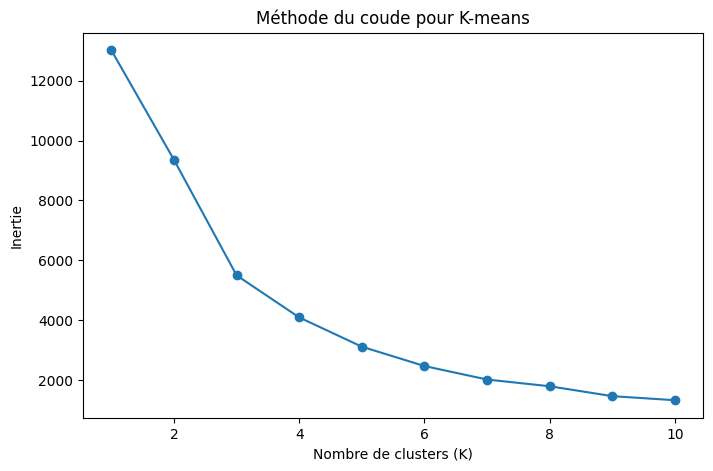

In [30]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # adapte au nombre de cœurs que tu veux

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour K-means")
plt.show()


### Application de K-means

Après analyse du coude, nous choisissons K = 4 clusters (exemple).
Chaque client est assigné à un cluster.


In [51]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped["Cluster"] = kmeans.fit_predict(X_scaled)
df_grouped.head()


,CustomerID,Frequency,Monetary,LastPurchase,Recency,Cluster
0,12346.0,1,77183.60,2011-01-18 10:01:00,325,3
1,12347.0,7,4310.00,2011-12-07 15:52:00,1,0
2,12348.0,4,1797.24,2011-09-25 13:13:00,74,0
3,12349.0,1,1757.55,2011-11-21 09:51:00,18,0
4,12350.0,1,334.40,2011-02-02 16:01:00,309,1


### Analyse des clusters

Nous examinons les caractéristiques moyennes des clusters :
- fréquence d’achat,
- montant total dépensé,
- ancienneté.


In [52]:
cluster_summary = df_grouped.groupby("Cluster")[["Frequency", "Monetary", "Recency"]].mean().round(2)
cluster_summary



,Frequency,Monetary,Recency
Cluster,,,
0,3.68,1353.63,42.70
1,1.55,478.85,247.08
2,82.54,127187.96,6.38
3,22.33,12690.50,14.50


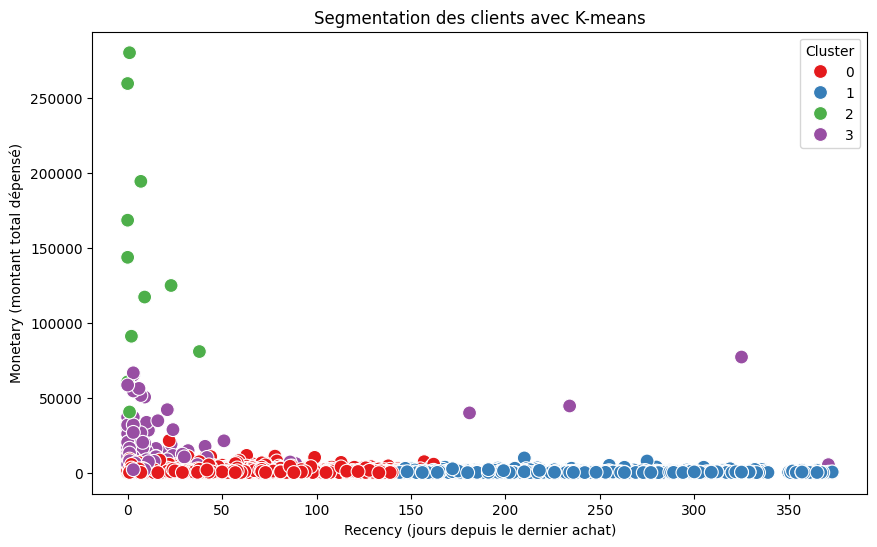

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_grouped, x="Recency", y="Monetary", hue="Cluster", palette="Set1", s=100)
plt.title("Segmentation des clients avec K-means")
plt.xlabel("Recency (jours depuis le dernier achat)")
plt.ylabel("Monetary (montant total dépensé)")
plt.legend(title="Cluster")
plt.show()

### Visualisation des clusters

Nous représentons les clusters en 2D pour comprendre leur répartition.
Exemple : Monetary vs Recency


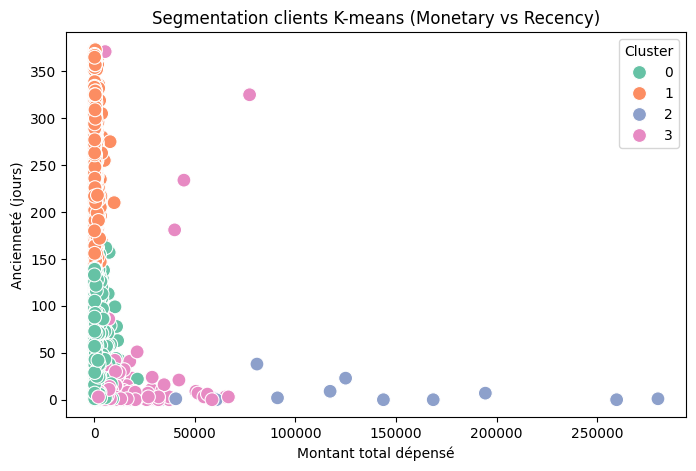

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Monetary",
    y="Recency",
    hue="Cluster",
    palette="Set2",
    data=df_grouped,
    s=100
)
plt.title("Segmentation clients K-means (Monetary vs Recency)")
plt.xlabel("Montant total dépensé")
plt.ylabel("Ancienneté (jours)")
plt.show()


### Vérification de la stabilité des clusters

Nous testons la stabilité en changeant `random_state` et en comparant l’inertie.
Une faible variation indique une segmentation robuste.


In [55]:
random_states = [10, 42, 100]
inertias = []

for rs in random_states:
    km = KMeans(n_clusters=4, random_state=rs)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

pd.DataFrame({"RandomState": random_states, "Inertia": inertias})


,RandomState,Inertia
0,10,4096.350679
1,42,4096.300211
2,100,4125.300955


### Interprétation des clusters

Exemple de lecture des clusters :
- Cluster 0 : clients peu fréquents, faible dépense → clients à réactiver
- Cluster 1 : clients fréquents, dépense moyenne → clients réguliers
- Cluster 2 : clients très dépensiers, achats fréquents → clients VIP
- Cluster 3 : clients récents avec faible dépense → nouveaux clients

Ces informations permettent de cibler des actions marketing personnalisées.


### Conclusion

La segmentation K-means a permis de regrouper les clients selon leur comportement d’achat.
Les profils obtenus constituent un outil d’aide à la décision
pour la mise en place de stratégies marketing ciblées.
- Les clusters identifiés servent à mieux comprendre la clientèle
- La stratégie marketing peut être adaptée en fonction des profils
- La stabilité des clusters a été vérifiée pour garantir la fiabilité du modèle


